<a href="https://colab.research.google.com/github/HoangTung99/CS114.L11.KHCL/blob/master/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [24]:
# Download model to detect face
!curl -o haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  908k  100  908k    0     0  5311k      0 --:--:-- --:--:-- --:--:-- 5311k


In [25]:
# Download image data that you want to detect
!curl -o test https://blog.wiziq.com/wp-content/uploads/2013/05/Getting-them-excited.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  153k  100  153k    0     0   619k      0 --:--:-- --:--:-- --:--:--  617k


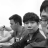

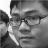

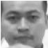

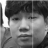

In [27]:
# load the photograph
pixels = cv2.imread('134665005_405081464250728_1056837724739859270_n.jpg')

# convert photo to gray scale
pixels = cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)

# load the pre-trained model
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# perform face detection
bboxes = classifier.detectMultiScale(pixels)

crop_image_list = []

# print bounding box for each detected face
for box in bboxes:
  x,  y, height, width = box

  # draw rectangle over the pixels by 2 anchors: top-left && bottom-right
  cv2.rectangle(pixels, (x, y), (x + width, y + height), (255, 255, 255), 1)
  
  # crop image
  crop_image = pixels[y: y+height, x: x+width].copy()

  # add crop_image to crop_image_list
  crop_image_list.append(crop_image)

# show the image
# cv2_imshow(pixels)

for crop_image in crop_image_list:
  cv2_imshow(cv2.resize(crop_image, (48, 48), interpolation = cv2.INTER_AREA))
  cv2.waitKey(0)